In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END
import random

In [65]:
class AgentState(TypedDict):
    # player_name: str
    greeting: str
    counter: int
    attempts: int
    lower_bounds: int
    upper_bounds: int
    ran_num: int
    guess: int
    result: str

In [124]:
def setup_node(state: AgentState) -> AgentState:
    state['ran_num'] = random.randint(1,20)
    state['greeting'] = f'Hey Student, The Game has Begun, Im thinking Of Number Between 1 and 20, Guess that'
    print(state['greeting'])
    state['counter'] = 0
    state['attempts'] = 0
    return state

def guess_node(state: AgentState) -> AgentState:
    state['guess'] = random.randint(state['lower_bounds'],state['upper_bounds'])
    state['counter'] += 1
    state['attempts'] += 1
    print(f"Guessed number is {state['guess']}")
    return state

def hint_node(state: AgentState) -> str:
    if state['counter'] >= 7:
        print(f'You Lost after {state['counter']} Tries')
        return 'end'
    else:
        if state['guess'] == state['ran_num']:
            print(f'You won the Number is {state['guess']}, you find it in {state['attempts']} attempts')
            return 'won'
        
        elif state['guess'] > state['ran_num']:
            state['upper_bounds'] = state['guess'] - 1
            print(f'The Number {state['guess']} is Too High')

        elif state['guess'] < state['ran_num']:
            state['lower_bounds'] = state['guess'] + 1
            print(f'The Number {state['guess']} is too Low')
            


        return 'loop'

In [125]:
graph = StateGraph(AgentState)

graph.add_node('setup_node', setup_node)
graph.add_node('guess_node', guess_node)
graph.add_node('hint_node', lambda state:state)

# graph.add_node('router', lambda state: state)


graph.add_edge(START, 'setup_node')
graph.add_edge('setup_node', 'guess_node')
graph.add_edge('guess_node', 'hint_node')

graph.add_conditional_edges(
    'hint_node', hint_node,{
        'end': END,
        'won': END,
        'loop': 'guess_node'
    } 
)


app = graph.compile()

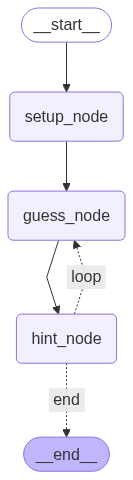

In [94]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [133]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bounds": 1, "upper_bounds": 20})

Hey Student, The Game has Begun, Im thinking Of Number Between 1 and 20, Guess that
Guessed number is 3
The Number 3 is too Low
Guessed number is 12
You won the Number is 12, you find it in 2 attempts
